In [1]:
pip install -U kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd 
from pandas_datareader import data 
import plotly.graph_objects as go 
import plotly.express as px
import yfinance as yf 
from datetime import date , timedelta 
from dateutil.relativedelta import relativedelta 
import numpy as np 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split 

In [3]:
from pandas_datareader import data
sdate = str(date.today() - timedelta(365))
edate = str(date.today())
symbol = 'AMZN'
df_amzn = yf.download(symbol, sdate, edate)
df_amzn = df_amzn.reset_index()
df_amzn.head()

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-05-24,104.025002,105.400002,101.260002,104.099998,104.099998,102934000
1,2022-05-25,103.655502,108.175003,103.650002,106.775002,106.775002,93120000
2,2022-05-26,107.970001,112.665497,107.453499,111.077499,111.077499,93002000
3,2022-05-27,113.550003,115.186996,112.627998,115.146500,115.146500,93660000
4,2022-05-31,116.279999,121.994499,115.675003,120.209503,120.209503,144634000


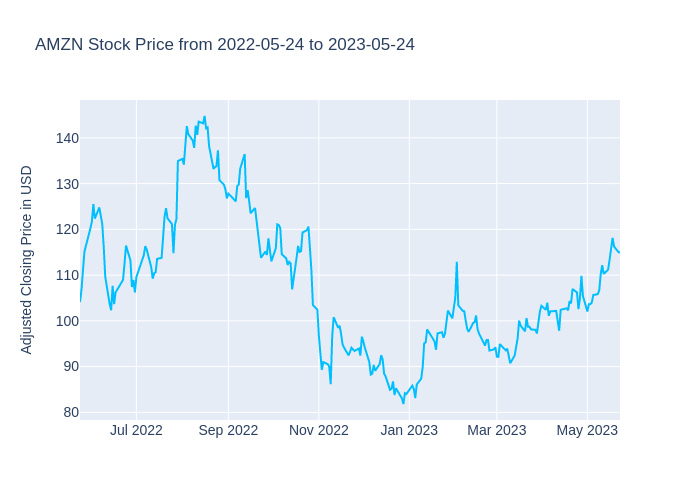

In [4]:
# Q1
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_amzn.Date,
                         y=df_amzn['Adj Close'],
                         line_color='deepskyblue'))
        

fig.update_layout(title=f'{symbol} Stock Price from {sdate} to {edate}',
                  yaxis_title='Adjusted Closing Price in USD',
                  xaxis_tickfont_size=14,
                  yaxis_tickfont_size=14)

fig.show("png")

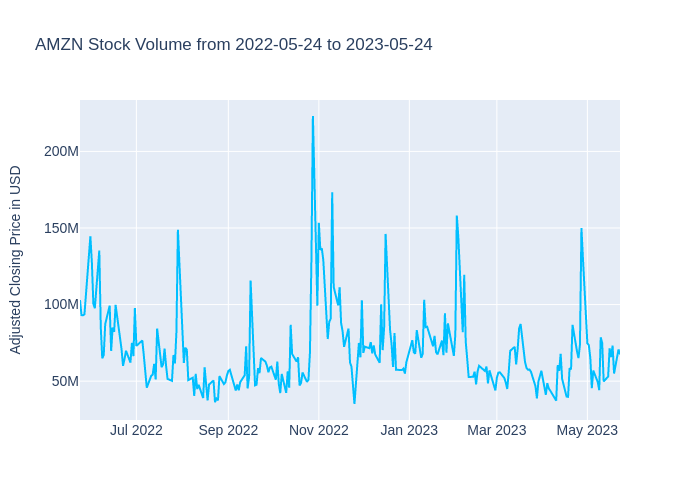

In [5]:
# Q2
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_amzn.Date,
                         y=df_amzn['Volume'],
                         line_color='deepskyblue'))
        

fig.update_layout(title=f'{symbol} Stock Volume from {sdate} to {edate}',
                  yaxis_title='Adjusted Closing Price in USD',
                  xaxis_tickfont_size=14,
                  yaxis_tickfont_size=14)

fig.show("png")

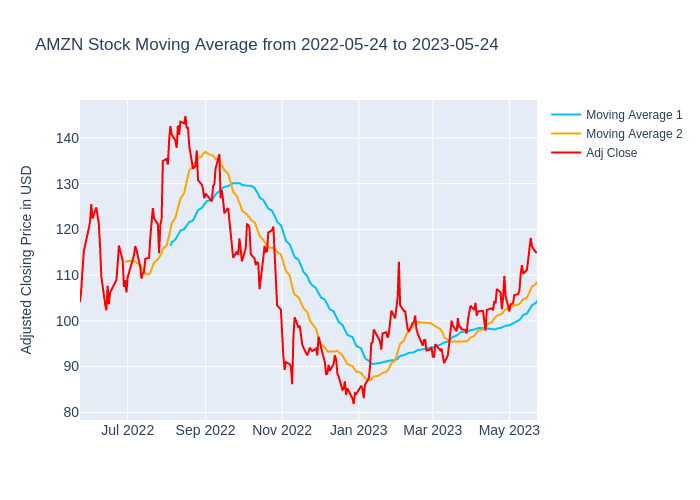

In [6]:
df_amzn['Moving Average'] = df_amzn['Close'].rolling(50).mean()
# df_amzn.dropna(inplace=True)


fig = go.Figure()
fig.add_trace(go.Scatter(x=df_amzn.Date,
                         y=df_amzn['Moving Average'],
                         line_color='deepskyblue',
                         name = 'Moving Average 1'))


fig.add_trace(go.Scatter(x=df_amzn.Date,
                         y=df_amzn['Close'].rolling(25).mean(),
                         line_color='Orange',
                         name = 'Moving Average 2'))

fig.add_trace(go.Scatter(x=df_amzn.Date,
                         y=df_amzn['Adj Close'],
                         line_color='red',
                         name = 'Adj Close'))

        

fig.update_layout(title=f'{symbol} Stock Moving Average from {sdate} to {edate}',
                  yaxis_title='Adjusted Closing Price in USD',
                  xaxis_tickfont_size=14,
                  yaxis_tickfont_size=14
)

fig.show("png")

In [7]:
df_amzn = yf.download(symbol, sdate, edate)
df_amzn = df_amzn.reset_index()
# df_amzn_a = df_amzn[['Date','Adj Close']]
df_amzn['Prev Close'] = df_amzn['Adj Close'].shift(1)
# df_amzn_a.dropna(inplace=True)
df_amzn.head()

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume,Prev Close
0,2022-05-24,104.025002,105.400002,101.260002,104.099998,104.099998,102934000,NaN
1,2022-05-25,103.655502,108.175003,103.650002,106.775002,106.775002,93120000,104.099998
2,2022-05-26,107.970001,112.665497,107.453499,111.077499,111.077499,93002000,106.775002
3,2022-05-27,113.550003,115.186996,112.627998,115.146500,115.146500,93660000,111.077499
4,2022-05-31,116.279999,121.994499,115.675003,120.209503,120.209503,144634000,115.146500


In [8]:
df_amzn['Daily Returns'] = (df_amzn['Adj Close']/df_amzn['Prev Close']) - 1
df_amzn.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Prev Close,Daily Returns
0,2022-05-24,104.025002,105.400002,101.260002,104.099998,104.099998,102934000,NaN,NaN
1,2022-05-25,103.655502,108.175003,103.650002,106.775002,106.775002,93120000,104.099998,0.025696
2,2022-05-26,107.970001,112.665497,107.453499,111.077499,111.077499,93002000,106.775002,0.040295
3,2022-05-27,113.550003,115.186996,112.627998,115.146500,115.146500,93660000,111.077499,0.036632
4,2022-05-31,116.279999,121.994499,115.675003,120.209503,120.209503,144634000,115.146500,0.043970


In [9]:
df_amzn[['Daily Returns']].mean(axis=0)

Daily Returns    0.000778
dtype: float64

In [10]:
df_amzn['Trend'] = np.where(df_amzn['Daily Returns'] >= 0, 'Positive', 'Negative')


In [11]:
s = df_amzn[['Date','Trend']]
# s['Count'] = s['Trend'].value_counts()
s = s.groupby(['Trend'])['Trend'].count().reset_index(name='Count')
s.describe()
s.head()

,Trend,Count
0,Negative,124
1,Positive,127


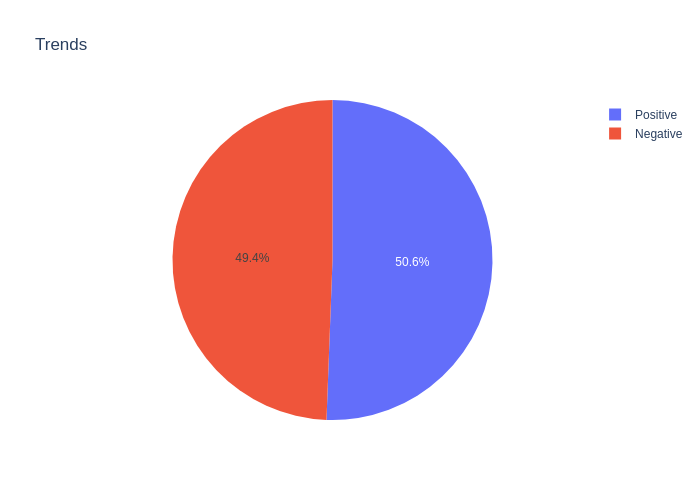

In [12]:
fig = px.pie(s, values='Count', names='Trend', title='Trends')
fig.show("png")

In [13]:
df_aapl = yf.download('AAPL', sdate, edate)
df_aapl = df_aapl.reset_index()
df_googl = yf.download('GOOGL', sdate, edate)
df_googl = df_googl.reset_index()
df_msft = yf.download('MSFT', sdate, edate)
df_msft = df_msft.reset_index()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


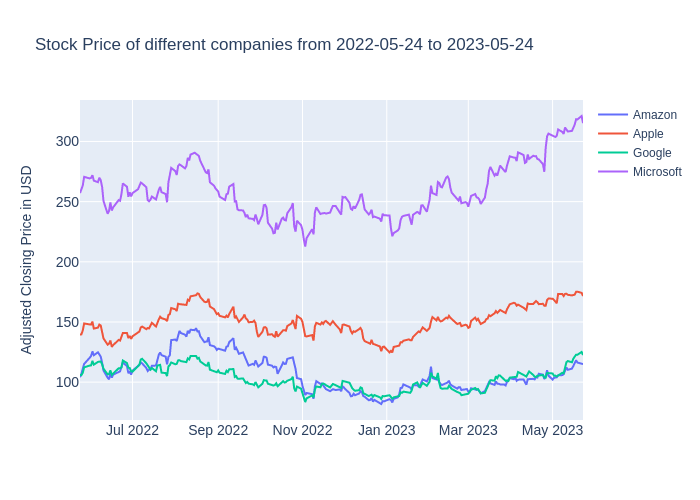

In [14]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_amzn.Date,
                         y=df_amzn['Adj Close'],
                         name = 'Amazon'))

fig.add_trace(go.Scatter(x=df_aapl.Date,
                         y=df_aapl['Adj Close'],
                         name = 'Apple'))

fig.add_trace(go.Scatter(x=df_googl.Date,
                         y=df_googl['Adj Close'],
                         name = 'Google'))

fig.add_trace(go.Scatter(x=df_msft.Date,
                         y=df_msft['Adj Close'],
                         name = 'Microsoft'))
        

fig.update_layout(title=f'Stock Price of different companies from {sdate} to {edate}',
                  yaxis_title='Adjusted Closing Price in USD',
                  xaxis_tickfont_size=14,
                  yaxis_tickfont_size=14)

fig.show("png")

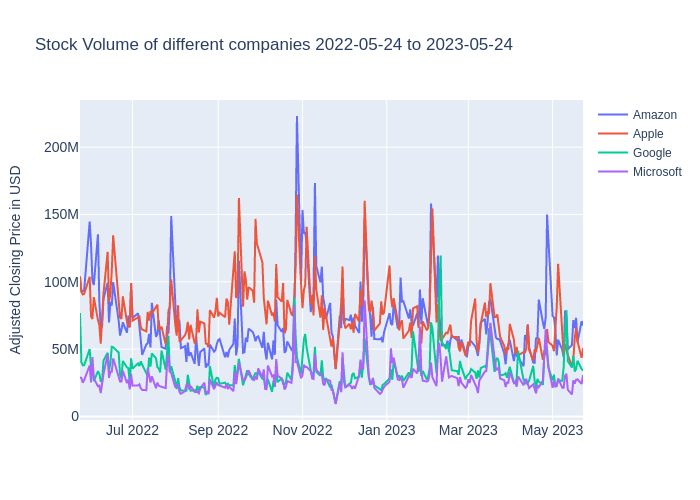

In [15]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_amzn.Date,
                         y=df_amzn['Volume'],
                         name = 'Amazon'))

fig.add_trace(go.Scatter(x=df_aapl.Date,
                         y=df_aapl['Volume'],
                         name = 'Apple'))

fig.add_trace(go.Scatter(x=df_googl.Date,
                         y=df_googl['Volume'],
                         name = 'Google'))

fig.add_trace(go.Scatter(x=df_msft.Date,
                         y=df_msft['Volume'],
                         name = 'Microsoft'))
        

fig.update_layout(title=f'Stock Volume of different companies {sdate} to {edate}',
                  yaxis_title='Adjusted Closing Price in USD',
                  xaxis_tickfont_size=14,
                  yaxis_tickfont_size=14)

fig.show("png")

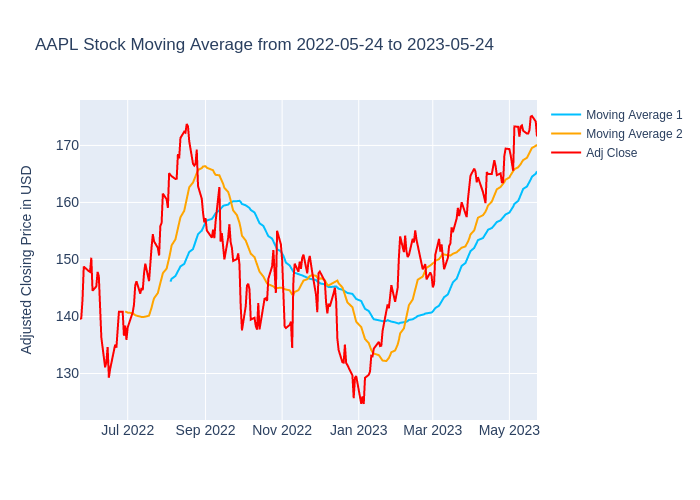

In [16]:
df_aapl['Moving Average'] = df_aapl['Close'].rolling(50).mean()


fig = go.Figure()
fig.add_trace(go.Scatter(x=df_aapl.Date,
                         y=df_aapl['Moving Average'],
                         line_color='deepskyblue',
                         name = 'Moving Average 1'))


fig.add_trace(go.Scatter(x=df_aapl.Date,
                         y=df_aapl['Close'].rolling(25).mean(),
                         line_color='Orange',
                         name = 'Moving Average 2'))

fig.add_trace(go.Scatter(x=df_aapl.Date,
                         y=df_aapl['Adj Close'],
                         line_color='red',
                         name = 'Adj Close'))

        

fig.update_layout(title=f'AAPL Stock Moving Average from {sdate} to {edate}',
                  yaxis_title='Adjusted Closing Price in USD',
                  xaxis_tickfont_size=14,
                  yaxis_tickfont_size=14)

fig.show("png")

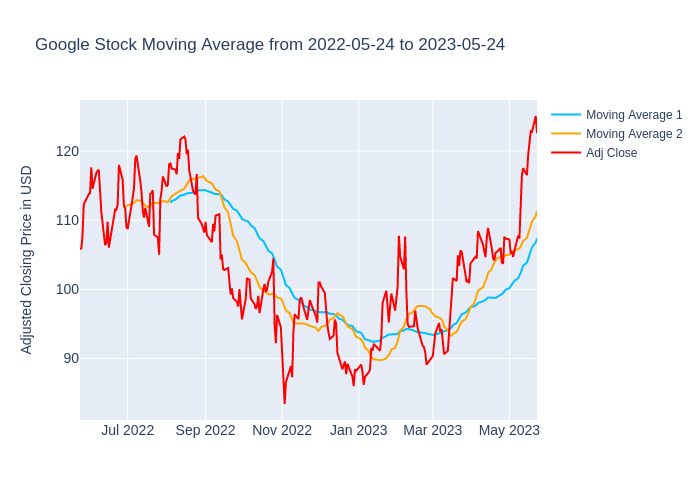

In [17]:
df_googl['Moving Average'] = df_googl['Close'].rolling(50).mean()


fig = go.Figure()
fig.add_trace(go.Scatter(x=df_googl.Date,
                         y=df_googl['Moving Average'],
                         line_color='deepskyblue',
                         name = 'Moving Average 1'))


fig.add_trace(go.Scatter(x=df_googl.Date,
                         y=df_googl['Close'].rolling(25).mean(),
                         line_color='Orange',
                         name = 'Moving Average 2'))

fig.add_trace(go.Scatter(x=df_googl.Date,
                         y=df_googl['Adj Close'],
                         line_color='red',
                         name = 'Adj Close'))

        

fig.update_layout(title=f'Google Stock Moving Average from {sdate} to {edate}',
                  yaxis_title='Adjusted Closing Price in USD',
                  xaxis_tickfont_size=14,
                  yaxis_tickfont_size=14)

fig.show("png")

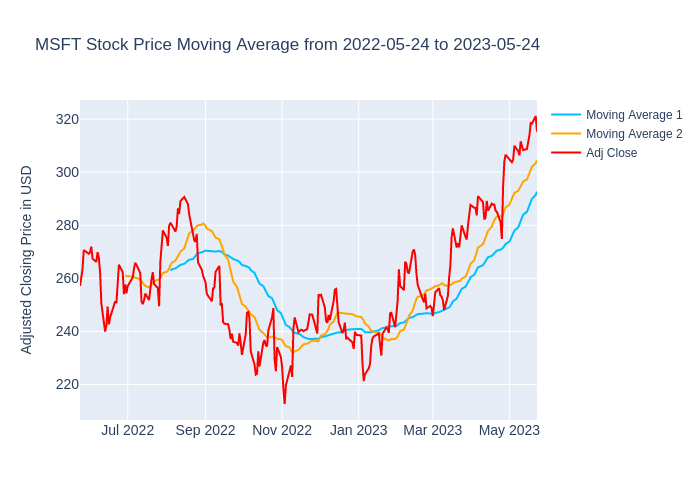

In [18]:
df_msft['Moving Average'] = df_msft['Close'].rolling(50).mean()


fig = go.Figure()
fig.add_trace(go.Scatter(x=df_msft.Date,
                         y=df_msft['Moving Average'],
                         line_color='deepskyblue',
                         name = 'Moving Average 1'))


fig.add_trace(go.Scatter(x=df_msft.Date,
                         y=df_msft['Close'].rolling(25).mean(),
                         line_color='Orange',
                         name = 'Moving Average 2'))

fig.add_trace(go.Scatter(x=df_msft.Date,
                         y=df_msft['Adj Close'],
                         line_color='red',
                         name = 'Adj Close'))

        

fig.update_layout(title=f'MSFT Stock Price Moving Average from {sdate} to {edate}',
                  yaxis_title='Adjusted Closing Price in USD',
                  xaxis_tickfont_size=14,
                  yaxis_tickfont_size=14)

fig.show("png")

In [19]:
df_aapl = df_aapl.reset_index()
df_aapl['Prev Close'] = df_aapl['Adj Close'].shift(1)
df_aapl.head()
df_aapl['Daily Returns'] = (df_aapl['Adj Close']/df_aapl['Prev Close']) - 1
df_aapl.head()

,index,Date,Open,High,Low,Close,Adj Close,Volume,Moving Average,Prev Close,Daily Returns
0,0,2022-05-24,140.809998,141.970001,137.330002,140.360001,139.526855,104132700,NaN,NaN,NaN
1,1,2022-05-25,138.429993,141.789993,138.339996,140.520004,139.685928,92482700,NaN,139.526855,0.001140
2,2,2022-05-26,137.389999,144.339996,137.139999,143.779999,142.926544,90601500,NaN,139.685928,0.023199
3,3,2022-05-27,145.389999,149.679993,145.259995,149.639999,148.751755,90978500,NaN,142.926544,0.040757
4,4,2022-05-31,149.070007,150.660004,146.839996,148.839996,147.956512,103718400,NaN,148.751755,-0.005346


In [20]:
df_aapl['Trend'] = np.where(df_aapl['Daily Returns'] >= 0, 'Positive', 'Negative')
s = df_aapl[['Date','Trend']]
s = s.groupby(['Trend'])['Trend'].count().reset_index(name='Count')
s.head()

,Trend,Count
0,Negative,122
1,Positive,129


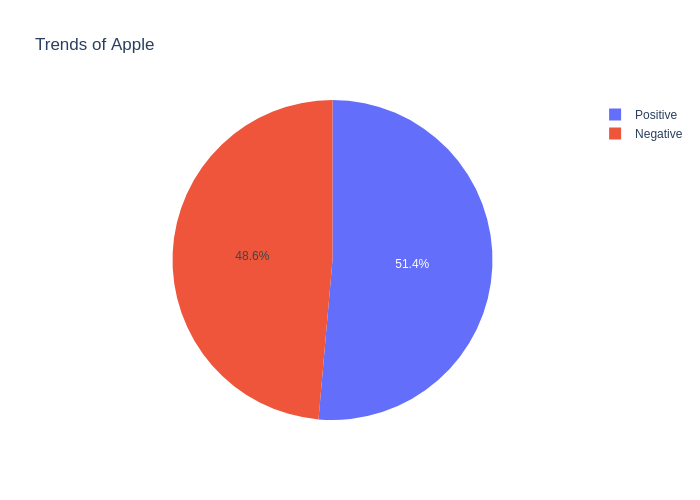

In [21]:
fig = px.pie(s, values='Count', names='Trend', title='Trends of Apple')
fig.show("png")

In [22]:
df_googl = df_googl.reset_index()
df_googl['Prev Close'] = df_googl['Adj Close'].shift(1)
df_googl.head()
df_googl['Daily Returns'] = (df_googl['Adj Close']/df_googl['Prev Close']) - 1
df_googl.head()

,index,Date,Open,High,Low,Close,Adj Close,Volume,Moving Average,Prev Close,Daily Returns
0,0,2022-05-24,105.772003,106.458504,101.884499,105.970001,105.970001,76780000,NaN,NaN,NaN
1,1,2022-05-25,104.985497,106.500000,103.856499,105.805000,105.805000,40258000,NaN,105.970001,-0.001557
2,2,2022-05-26,105.677002,108.649498,105.224998,107.792503,107.792503,37948000,NaN,105.805000,0.018785
3,3,2022-05-27,109.483002,112.318001,109.138496,112.316498,112.316498,37914000,NaN,107.792503,0.041969
4,4,2022-05-31,112.746498,115.735001,112.078499,113.762001,113.762001,50012000,NaN,112.316498,0.012870


In [23]:
df_googl['Trend'] = np.where(df_googl['Daily Returns'] >= 0, 'Positive', 'Negative')
s = df_googl[['Date','Trend']]
s = s.groupby(['Trend'])['Trend'].count().reset_index(name='Count')
s.head()

,Trend,Count
0,Negative,129
1,Positive,122


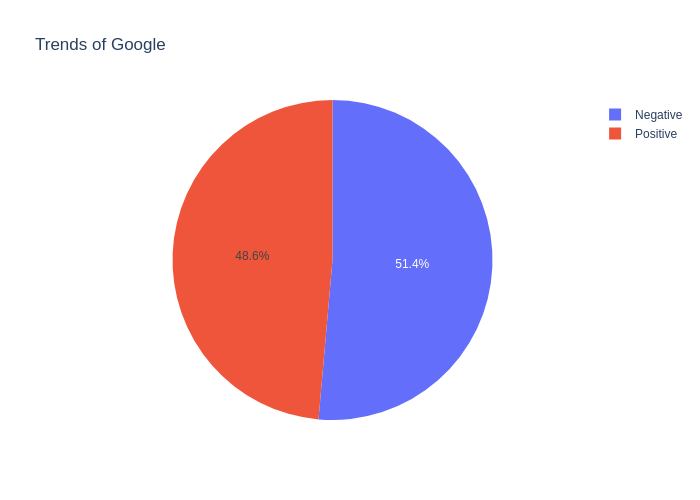

In [24]:
fig = px.pie(s, values='Count', names='Trend', title='Trends of Google')
fig.show("png")

In [25]:
df_msft = df_msft.reset_index()
df_msft['Prev Close'] = df_msft['Adj Close'].shift(1)
df_msft.head()
df_msft['Daily Returns'] = (df_msft['Adj Close']/df_msft['Prev Close']) - 1
df_msft.head()

,index,Date,Open,High,Low,Close,Adj Close,Volume,Moving Average,Prev Close,Daily Returns
0,0,2022-05-24,257.890015,261.329987,253.500000,259.619995,257.134491,29043900,NaN,NaN,NaN
1,1,2022-05-25,258.140015,264.579987,257.130005,262.519989,260.006714,28547900,NaN,257.134491,0.011170
2,2,2022-05-26,262.269989,267.109985,261.429993,265.899994,263.354340,25002100,NaN,260.006714,0.012875
3,3,2022-05-27,268.480011,273.339996,267.559998,273.239990,270.624054,26910800,NaN,263.354340,0.027604
4,4,2022-05-31,272.529999,274.769989,268.929993,271.869995,269.267242,37827700,NaN,270.624054,-0.005014


In [26]:
df_msft['Trend'] = np.where(df_msft['Daily Returns'] >= 0, 'Positive', 'Negative')
s = df_msft[['Date','Trend']]
s = s.groupby(['Trend'])['Trend'].count().reset_index(name='Count')
s.head()

,Trend,Count
0,Negative,132
1,Positive,119


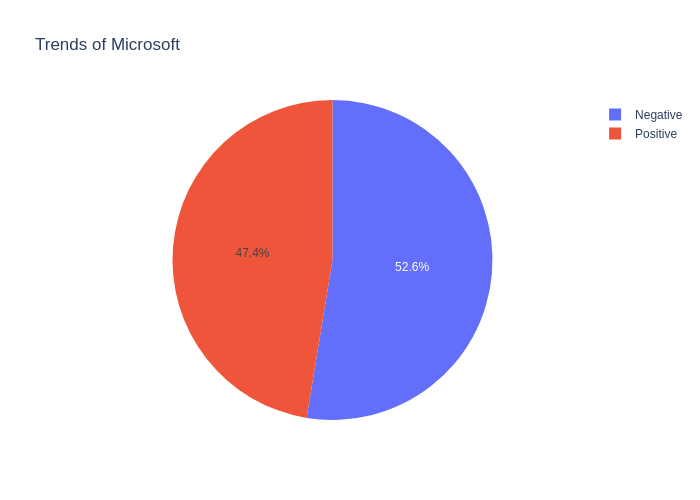

In [27]:
fig = px.pie(s, values='Count', names='Trend', title='Trends of Microsoft')
fig.show("png")

In [28]:
corpus=pd.concat([df_amzn['Daily Returns'],df_aapl['Daily Returns'],df_msft['Daily Returns'],df_googl['Daily Returns']],axis=1)
corpus.columns={"Amazon Return","Google Return","Apple Return","Microsoft Return"}

In [29]:
corpus.head()

,Google Return,Amazon Return,Microsoft Return,Apple Return
0,NaN,NaN,NaN,NaN
1,0.025696,0.001140,0.011170,-0.001557
2,0.040295,0.023199,0.012875,0.018785
3,0.036632,0.040757,0.027604,0.041969
4,0.043970,-0.005346,-0.005014,0.012870


In [30]:
corpus.dropna(inplace=True)

In [31]:
corpus

,Google Return,Amazon Return,Microsoft Return,Apple Return
1,0.025696,0.001140,0.011170,-0.001557
2,0.040295,0.023199,0.012875,0.018785
3,0.036632,0.040757,0.027604,0.041969
4,0.043970,-0.005346,-0.005014,0.012870
5,0.012266,-0.000873,0.002023,0.001143
...,...,...,...,...
246,0.018519,0.003603,0.009452,0.011129
247,0.022944,0.013666,0.014395,0.016468
248,-0.016081,0.000628,-0.000565,-0.000570
249,-0.010667,-0.005481,0.008921,0.018654


In [32]:
corpus.corr()

,Google Return,Amazon Return,Microsoft Return,Apple Return
Google Return,1.000000,0.668530,0.741064,0.729852
Amazon Return,0.668530,1.000000,0.756427,0.738006
Microsoft Return,0.741064,0.756427,1.000000,0.796810
Apple Return,0.729852,0.738006,0.796810,1.000000


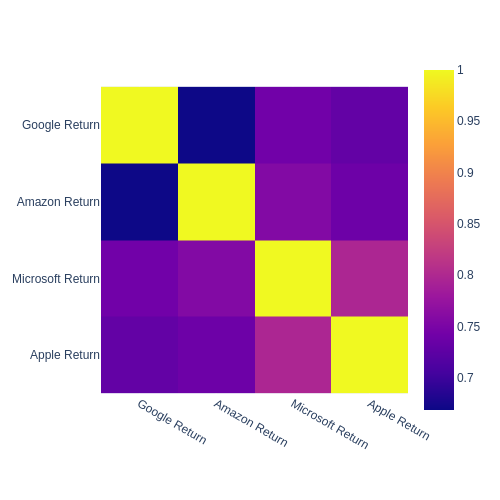

In [33]:
corp = corpus.corr()
fig = px.imshow(corp, x=corp.columns, y=corp.index)
fig.update_layout(width=500,height=500)
fig.show("png")

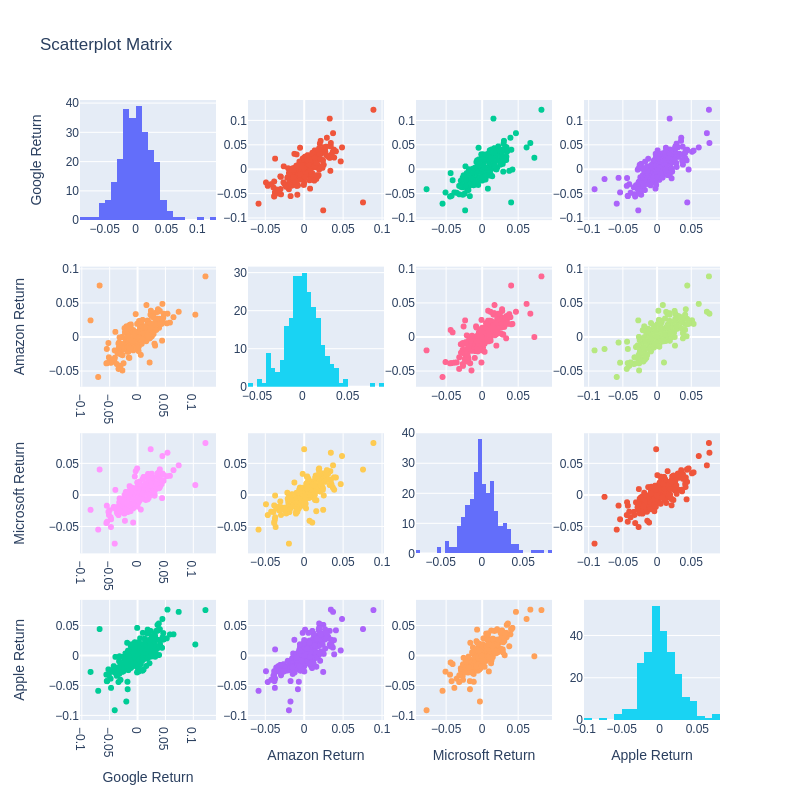

In [34]:
import plotly.figure_factory as ff

fig = ff.create_scatterplotmatrix(corpus, diag='histogram', height=800, width=800)
fig.show("png")